In [1]:
import pandas as pd
from fbprophet import Prophet
from pathlib import Path

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv(Path('..\Data\\safemoon-usd-max.csv'))[['snapped_at', 'price']]
df.head()

,snapped_at,price
0,2021-03-14 00:00:00 UTC,5.645537e-08
1,2021-03-15 00:00:00 UTC,5.645537e-08
2,2021-03-16 00:00:00 UTC,8.119352e-08
3,2021-03-17 00:00:00 UTC,1.842492e-07
4,2021-03-18 00:00:00 UTC,1.232149e-07


In [3]:
df.rename(columns={'snapped_at': 'ds', 'price': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
df = df.loc[df['ds'].dt.year >= 2021]
df.head()

,ds,y
0,2021-03-14,5.645537e-08
1,2021-03-15,5.645537e-08
2,2021-03-16,8.119352e-08
3,2021-03-17,1.842492e-07
4,2021-03-18,1.232149e-07


In [4]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2021-03-14,-5.729600e-07,-0.000002,0.000001
1,2021-03-15,-5.812703e-07,-0.000002,0.000001
2,2021-03-16,-2.989135e-07,-0.000002,0.000001
3,2021-03-17,-2.960505e-08,-0.000002,0.000002
4,2021-03-18,-2.527056e-07,-0.000002,0.000001


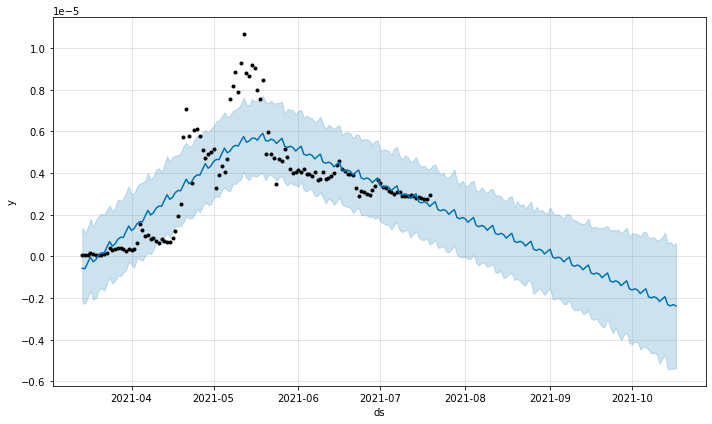

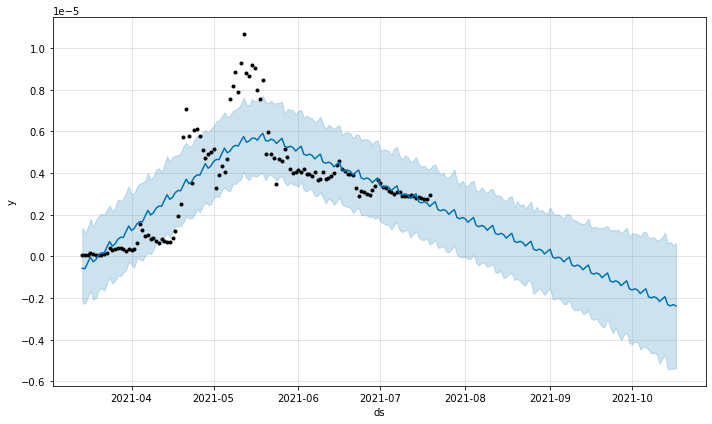

In [5]:
m.plot(forecast)

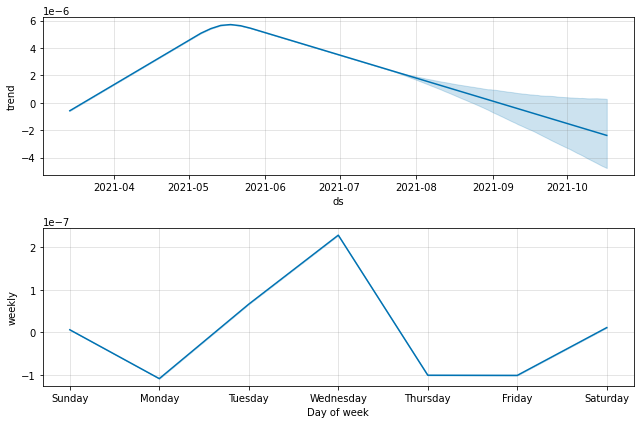

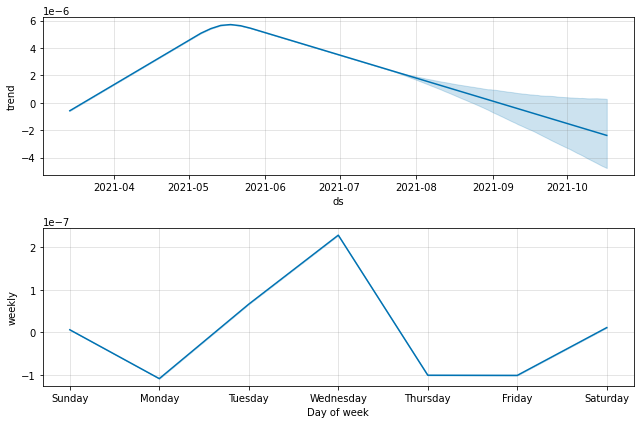

In [6]:
m.plot_components(forecast)